# 500_RQ2B

# _Question Two: What Vehicles are involved in the most road accidents?_

## _(B): Is it safer to travel by car than by motorcycle?_
We return to part B of our second research question in this notebook and specificlly focus on concluding whether or not it is safer to drive by car than by motorcycle. The data used to answer this question ranges between the years 1993 - 2016.

## Notebook Contents:
* __1:__ Some Matplotlib Configuration

* __2:__ Loading the Data

* __3:__ Which type of vehicle has the highest number of accidents?

* __4:__ On average, which vehicle type has the most casualties?
      
* __5:__ Which type of vehicle is involved in the most fatally severe accidents?

* __6:__ Is one vehicle type safer than another in rainy weather conditions?

* __7:__ Conclusions: Is it safer to travel by car than by motorbike?


## Datasets

__Input:__
* 500_Analysis_Q2B_norm_All_Num_Veh_Accidents.pkl   (Number of accidents for each vehicle type)
* 500_Analysis_Q2B_All_Number_of_Casualties.pkl   (Average number of casualties for each vehicle type)
* 500_Analysis_Q2B_norm_All_Number_Accident_Severity.pkl   (Normalised accident severity for each vehicle type)
* 500_Analysis_Q2B_norm_All_weather_conditions_groups.pkl   (Normalised weather conditions for vehicle type)
* 500_Analysis_Q2B_norm_rain_analysis_all.pkl   (Normalised rain analysis for vehicle type)


__Output:__ n/a

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

% matplotlib inline

C:\Users\Ciara\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# 1. Some Matplotlib Configuration

Below we have included some formatting which we want each of our plots to follow.

This template has been taken from Barry's Valencia Results Notebooks.

In [2]:
sns.set_style("whitegrid")
sns.set_style("ticks")
sns.set_palette("muted")
sns.set_context("poster")

# Text, lines, and markers...
plt.rcParams['text.color'] = 'k'
plt.rcParams['axes.labelcolor'] = 'k'

plt.rcParams['axes.titlesize'] = 40
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['axes.labelweight'] = 'bold'

plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

plt.rcParams['axes.grid'] = True

plt.rcParams['lines.markersize'] = 30
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['lines.linewidth'] = 2

plt.rcParams['legend.fontsize'] = 20

# 2. Loading the Data

In [3]:
vehicle_num_accidents = pd.read_pickle('../../data/analysis/500_Analysis_Q2B_norm_All_Num_Veh_Accidents.pkl')
vehicle_num_accidents.shape

(18, 1)

In [4]:
veh_num_casualties = pd.read_pickle('../../data/analysis/500_Analysis_Q2B_All_Number_of_Casualties.pkl')
veh_num_casualties.shape

(18, 1)

In [5]:
veh_type_num_accident_severity = pd.read_pickle('../../data/analysis/500_Analysis_Q2B_norm_All_Number_Accident_Severity.pkl')
veh_type_num_accident_severity.shape

(18, 3)

In [6]:
veh_type_weather_conditions = pd.read_pickle('../../data/analysis/500_Analysis_Q2B_norm_All_weather_conditions_groups.pkl')
veh_type_weather_conditions.shape

(136, 3)

In [7]:
veh_type_rain_analysis = pd.read_pickle('../../data/analysis/500_Analysis_Q2B_norm_rain_analysis_all.pkl')
veh_type_rain_analysis.shape

(18, 4)

# 3. Which type of vehicle has the highest number of accidents?
The graph below shows the total number of accidents for each vehicle type. You can see that cars have a significantly higher % of accidents in comparison to the other vehicle types.

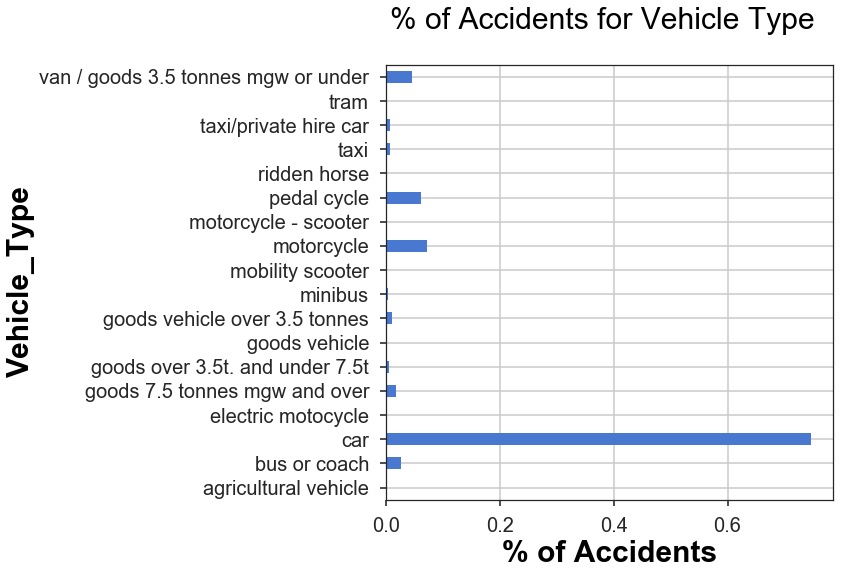

In [8]:
vehicle_num_accidents.plot(kind='barh', figsize=(8,8), legend=False)
plt.xlabel('% of Accidents')
plt.suptitle('% of Accidents for Vehicle Type', fontsize=30)
plt.show()

Next we will specifically focus on comparing the number of accidents that both cars and motorcyles are involved in. 

The graph below shows that cars have significantly more accidents than motorcycles. Cars are involved in roughly 74% of road accidents in comparison to motorcyles being roughly 7%.

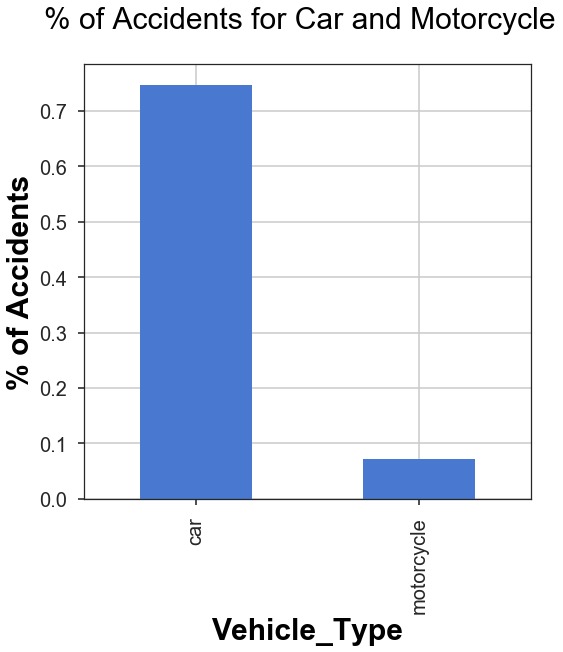

In [10]:
car_num_accidents = vehicle_num_accidents[(vehicle_num_accidents.index == 'car')]
motorcycle_num_accidents = vehicle_num_accidents[(vehicle_num_accidents.index == 'motorcycle')]
car_motorcycle_num_accidents = pd.concat([car_num_accidents, motorcycle_num_accidents])
car_motorcycle_num_accidents.plot(kind='bar', figsize=(8,8), legend=False)
plt.suptitle('% of Accidents for Car and Motorcycle', fontsize=30)
plt.ylabel('% of Accidents')
plt.show()

# 4. On average, which vehicle type has the most casualties?
The graph below shows the average number of casualties in an accident for all vehicle types. Minibus has the highest average number of casualties which is possibly as a result of the greater number of passengers that it can carry.  

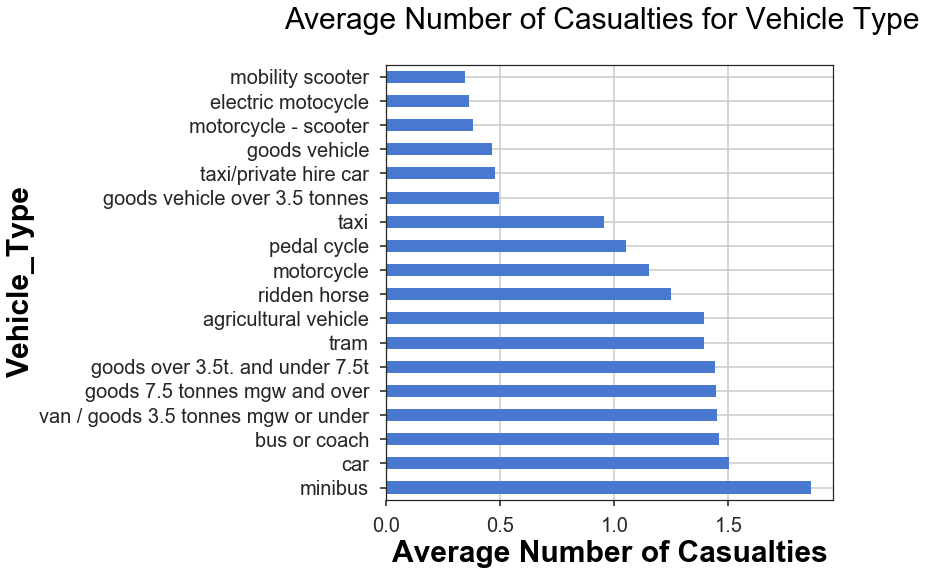

In [11]:
veh_num_casualties.sort_values(by=['Number_of_Casualties'], ascending = False).plot(kind='barh', figsize=(8,8), legend=False)
plt.xlabel('Average Number of Casualties')
plt.suptitle('Average Number of Casualties for Vehicle Type', fontsize=30)
plt.show()

Now we will specificlly focus on comparing the average number of casualties for cars and motorbikes.

The graph below shows the average number of casualties for both cars and motorcycles. You can see that on average cars have ~0.35 more casualties than motorcyles. 

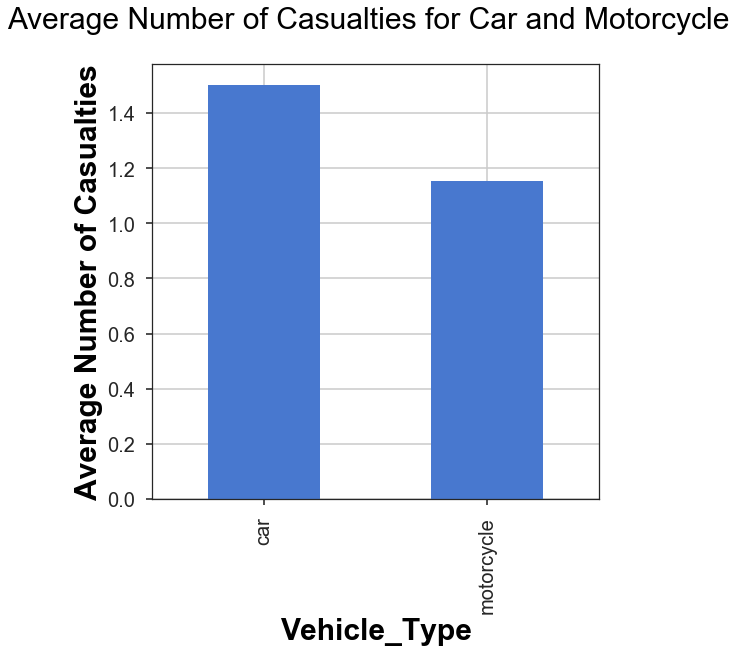

In [12]:
car_num_casualties = veh_num_casualties[(veh_num_casualties.index == 'car')]
motorcycle_num_casualties = veh_num_casualties[(veh_num_casualties.index == 'motorcycle')]
car_motorcycle_casualties = pd.concat([car_num_casualties, motorcycle_num_casualties])
car_motorcycle_casualties.plot(kind='bar', figsize=(8,8), legend=False)
plt.suptitle('Average Number of Casualties for Car and Motorcycle', fontsize=30)
plt.ylabel('Average Number of Casualties')
plt.show()

# 5. Which type of vehicle is involved in the most fatally severe accidents?
The following graph illustrates the comparison between the Accident Severity for each vehicle type. For each vehicle type you can see the comparison between the number of 'fatal', 'serious' and 'slight' severity accidents in terms of a %.

Overall, all vehicle types have a significantly higher number of slight accidents. It is also clear that all vehicle types have fewer fatal accidents thatn serious accidents.

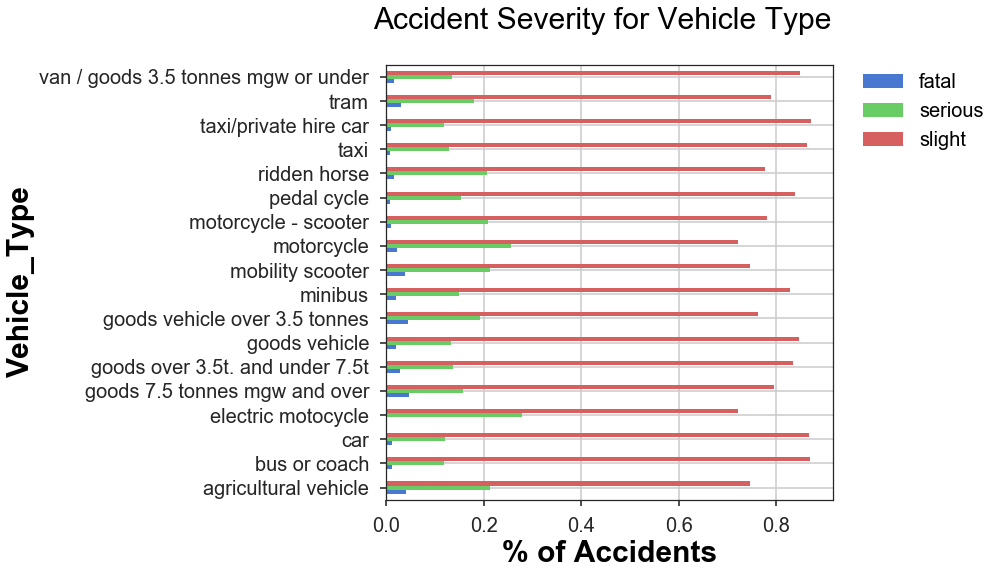

In [13]:
veh_type_num_accident_severity.plot(kind='barh', figsize=(8,8))
plt.xlabel('% of Accidents')
plt.suptitle('Accident Severity for Vehicle Type', fontsize=30)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Below you can see the specific comparison between the accident severity for cars and motorcycles. 

It is very clear that both cars and motorcycles follow the same distribution with slight accidents having a much higher % in comparison to the number of serious and fatal accidents. Serious accidents have the second highest % followed by fatal having a relatively small number for both.

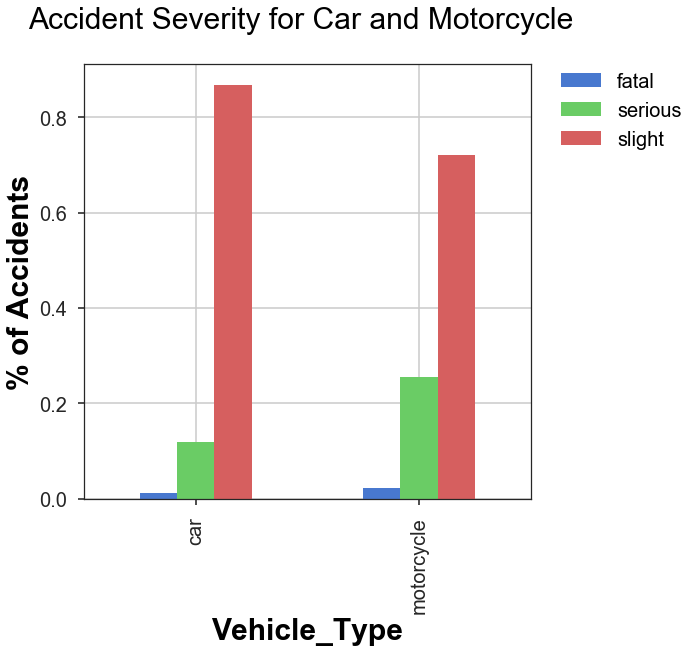

In [14]:
car_severity = veh_type_num_accident_severity[(veh_type_num_accident_severity.index == 'car')]
motorcycle_severity = veh_type_num_accident_severity[(veh_type_num_accident_severity.index == 'motorcycle')]
car_motorcycle_severity = pd.concat([car_severity, motorcycle_severity])
car_motorcycle_severity.plot(kind='bar', figsize=(8,8))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.suptitle('Accident Severity for Car and Motorcycle', fontsize=30)
plt.ylabel('% of Accidents')
plt.show()

# 6. Is one vehicle type safer than another in rainy weather conditions?
Again, focusing on cars and motorcycles we thought that it would be interesting to see how they compare in rainy weather conditions. In order to see which is safer we looked at the accident severity in such conditions. The graph below shows the number of fatal/serious/slight accidents in rainy weather conditions for both cars and motorcycles.

The graph shows that both cars and motorcycles have a much higher % of slight accidents in 'raining no high winds' in comparison to the other conditions. We were interested to see that there were only a small % of fatal accidents as we anticpated that there may have been more.

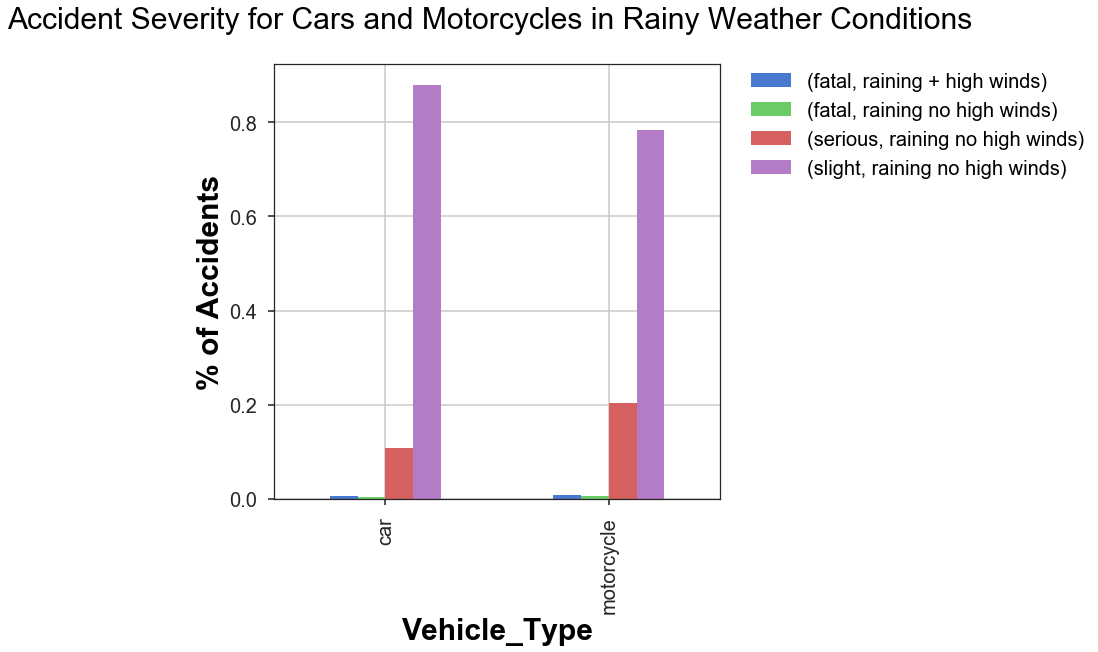

In [15]:
car_rain = veh_type_rain_analysis[(veh_type_rain_analysis.index == 'car')]
motorcycle_rain = veh_type_rain_analysis[(veh_type_rain_analysis.index == 'motorcycle')]
car_motorcycle_rain = pd.concat([car_rain, motorcycle_rain])
car_motorcycle_rain.plot(kind='bar', figsize=(8,8))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.suptitle('Accident Severity for Cars and Motorcycles in Rainy Weather Conditions', fontsize=30)
plt.ylabel('% of Accidents')
plt.show()

Next we will look at the total number of fatal, serious and slight accidents in rainy weather conditions both cars and motorcycles.

First, we will get the total number of fatal, serious and slight accidents for cars by unstacking the data then grouping by the rows (fatal, serious, slight). We will then sum the values in each of these groups. We will repeat this for motorcyles.

We will also convert the series to a dataframe and rename the column to specify that it contains the number of accidents for cars/motorcycles.

In [16]:
car_rain_sum_severity = car_rain.unstack().groupby(level=0).sum()
car_rain_sum_severity = car_rain_sum_severity.to_frame().rename(index=str, columns={0: "Number of Accidents for Cars"}) 
car_rain_sum_severity

,Number of Accidents for Cars
fatal,0.011515
serious,0.108586
slight,0.879899


In [17]:
motorcycle_rain_sum_severity = motorcycle_rain.unstack().groupby(level=0).sum()
motorcycle_rain_sum_severity = motorcycle_rain_sum_severity.to_frame().rename(index=str, columns={0: "Number of Accidents for Motorcycles"})
motorcycle_rain_sum_severity 

,Number of Accidents for Motorcycles
fatal,0.014027
serious,0.203183
slight,0.782790


Next, we will concatenate these results into one dataframe to plot.

In [18]:
motorcycle_car_rain_sum_severity = pd.concat([car_rain_sum_severity, motorcycle_rain_sum_severity], axis=1)
motorcycle_car_rain_sum_severity 

,Number of Accidents for Cars,Number of Accidents for Motorcycles
fatal,0.011515,0.014027
serious,0.108586,0.203183
slight,0.879899,0.782790


The graph below shows the % of fatal, serious and slight accdients for both cars and motocycles in rainy weather conditions. You can see that both have a much higher amount of slight accidents and only a small amount of fatal and serious accidents.

However, motorcycles have a higher % of serious and fatal accidents in comparison to cars.

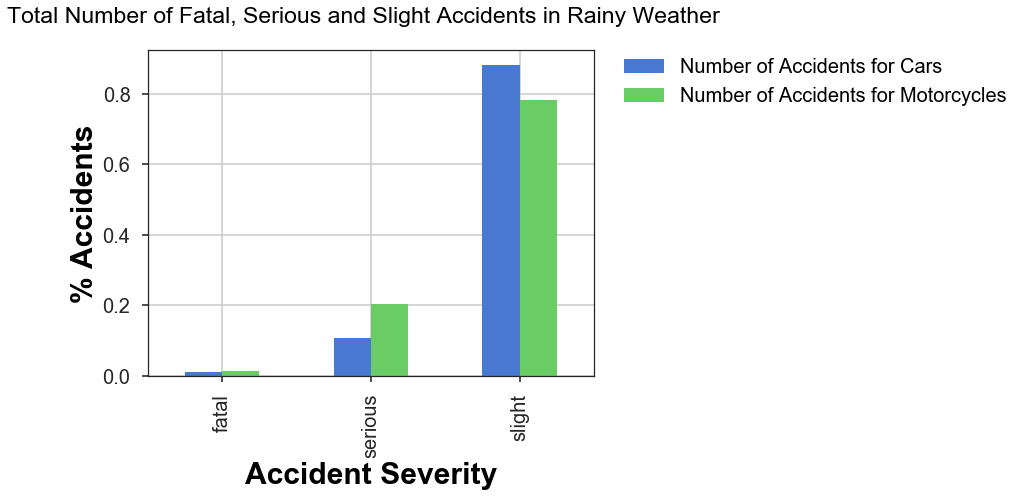

In [19]:
motorcycle_car_rain_sum_severity.plot(kind='bar', figsize=(8,6))
plt.suptitle('Total Number of Fatal, Serious and Slight Accidents in Rainy Weather')
plt.ylabel('% Accidents')
plt.xlabel('Accident Severity')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# 7. Conclusions: Is it safer to travel by car than by motorcycle?
We cannot conclusively say that either cars or motorcycles are safer than the other as both are safer in different situations as described below.

* From the data we found that cars are involved in more road accidents than vehicles with cars involved in ~74% of accidents on the roads in comparison to motorcycles being involved in only ~7%.
* On average, cars have a greater number of casualties in a road accident than motorcycles with cars having ~1.5 casualties per accident and motorcycles having ~1.15 casualties per accident. We believe the reason for this result is that there can be no more than two people on a motorcycle when driving on the road and cars can have a much larger number of passengers. This suggests that it is safer to travel by car.
* When comparing the severity of accidents for cars and motorcycles we found that cars and motorcycles follow a similar distribution with respect to the number of ‘fatal’, ‘serious’ and ‘slight’ accidents. Both have a much higher number of slight accidents than ‘serious’ or ‘fatal’. However, from the graphs you can see that motorcycles have a higher percentage of ‘serious’ and ‘fatal’ accidents than cars.
* While cars have a higher % of slight accidents in rainy weather conditions, motorcycles have a higher combined % of serious and fatal accidents (~22% vs ~12%). Therefore, the data indicates that it is safer to drive by car in rainy weather conditions than a motorcycle.